![python](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbXTQIiSiA8VpVsXnarEvBU1YOTsLDQHNzlg&usqp=CAU)![tesla](https://spng.pngfind.com/pngs/s/49-499731_profile-logo-art-tesla-logo-hd-png-download.png)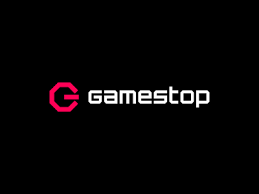

# **Peer-Graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard**
## IBM Data Science Professional Certificate > Course: Python Project for Data Science

### **Table of Contents**

#### * *Define a Function that Makes a Graph*
#### * *Question 1: Use yfinance to Extract Stock Data*
#### * *Question 2: Use Webscraping to Extract Tesla Revenue Data*
#### * *Question 3: Use yfinance to Extract Stock Data*
#### * *Question 4: Use Webscraping to Extract GME Revenue Data*
#### * *Question 5: Plot Tesla Stock Graph*
#### * *Question 6: Plot GameStop Stock Graph*


Installing python libraries "yfinance" and "bs4". 

In [2]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries.

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Creating a function for graph

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,height=900,title=stock,xaxis_rangeslider_visible=True)
    fig.show()

**Question 1 - Extracting Tesla Stock Data Using yfinance**

Using the Ticker function to extract data by using ticker symbol of tesla(TSLA), creating a Ticker object tesla

In [5]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [6]:
tesla_data = tesla.history(period="max")

Resetting the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function.

In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


**Question 2 - Extracting Tesla Revenue Data Using Webscraping**

Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_data.

In [9]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text

Parse the html data using beautiful_soup.

In [10]:
soup = BeautifulSoup(html_data,"html5lib")

Using beautiful soup extract the table with Tesla Quarterly Revenue and store it into a dataframe named tesla_revenue.

In [11]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [12]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].astype(bool)]

Display the last 5 row of the tesla_revenue dataframe using the tail function.

In [13]:
tesla_revenue.tail()

,Date,Revenue
46,2010-09-30,31
47,2010-06-30,28
48,2010-03-31,21
50,2009-09-30,46
51,2009-06-30,27


**Question 3 - Extracting GameStop Stock Data Using yfinance**

Using the Ticker function to extract data by using ticker symbol of GameStop(GME), creating a Ticker object GameStop

In [14]:
gme = yf.Ticker('GME')

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.

In [15]:
gme_data = gme.history(period='max')

Resetting the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function.

In [16]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850829,6.864295,6.682504,6.733001,2755400,0.0,0.0
2,2002-02-15,6.733002,6.749834,6.632007,6.699337,2097400,0.0,0.0
3,2002-02-19,6.665672,6.665672,6.312190,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


**Question 4 - Extracting GameStop Revenue Data Using Webscraping**

Using the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Saving the text of the response as a variable named html_data.

In [17]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html_data = requests.get(url).text

Parsing the html data using beautiful_soup.

In [18]:
soup = BeautifulSoup(html_data,"html5lib")

Using beautiful soup extract the table with GameStop Quarterly Revenue and store it into a dataframe named gme_revenue.

In [19]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

Displaying the last five rows of the gme_revenue dataframe using the tail function.

In [20]:
gme_revenue.tail()

,Date,Revenue
49,2010-01-31,3524
50,2009-10-31,1835
51,2009-07-31,1739
52,2009-04-30,1981
53,2009-01-31,3492


**Question 5 - Tesla Stock and Revenue Dashboard**

Using the make_graph function to graph the Tesla Stock Data, also adding a title for the graph.

In [21]:
make_graph(tesla_data[['Date','Close']], tesla_revenue, 'Tesla')

**Question 6 - GameStop Stock and Revenue Dashboard**

Using the make_graph function to graph the GameStop Stock Data, also adding a title for the graph.

In [22]:
make_graph(gme_data[['Date','Close']], gme_revenue, 'GameStop')